<a href="https://colab.research.google.com/github/knightfury16/ML_Assignments/blob/main/AssignmentProblem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [3]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model


# Extract Data


## Unzip

In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/Archive.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to the current directory in Colab runtime

## Read data

In [5]:
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/val'

# Basic information on data

In [6]:
# code to show how many images are there in train_path/NORMAL

import os
count = 0
for root, dirs, files in os.walk(train_path + '/NORMAL'):
    for file in files:
        count += 1
print(count)


1341


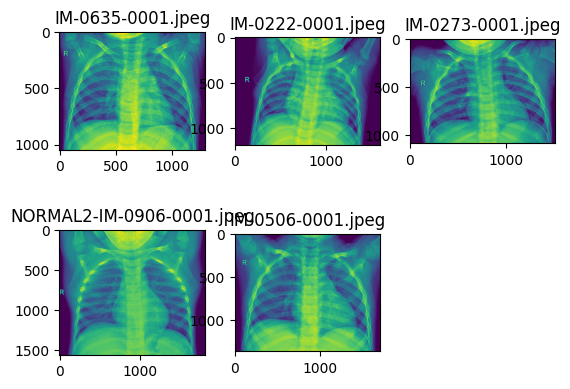

In [7]:
#  show 5 images from train_path/NORMAL

import matplotlib.pyplot as plt
import random

fig = plt.figure()

for i in range(5):
  image_path = random.choice(os.listdir(train_path + '/NORMAL'))
  img = plt.imread(train_path + '/NORMAL/' + image_path)
  ax = fig.add_subplot(2, 3, i + 1)
  ax.imshow(img)
  ax.set_title(image_path)

plt.show()


In [8]:
# print the dimension of an image in train_path/NORMAL

image_path = random.choice(os.listdir(train_path + '/NORMAL'))
img = plt.imread(train_path + '/NORMAL/' + image_path)
print(img.shape)


(1294, 1546)


# Image data generator

## Generator Model

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True  # Randomly flip images horizontally
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation data

test_datagen = ImageDataGenerator(rescale = 1./255)


## Data generation

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to training data
    target_size=(224, 224),  # Resize images to a consistent size
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    shuffle = False,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    val_path,  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Image after generator

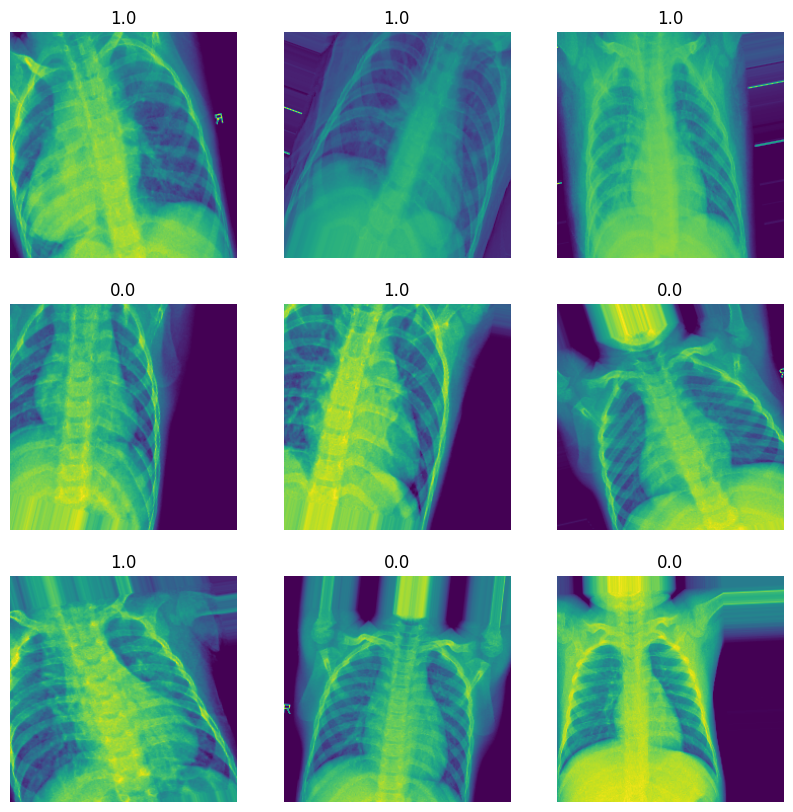

In [11]:
# Plot a few sample images
for X_batch, y_batch in train_generator:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i])
        plt.title(y_batch[i])  # Display class label
        plt.axis('off')
    plt.show()
    break  # Only display one batch


# CNN Model

## Modeling

In [12]:


model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Compile

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Plot Model

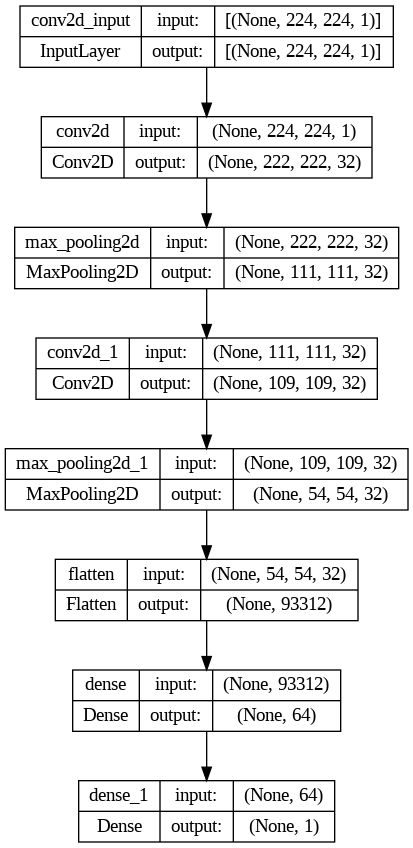

In [14]:

plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## IsGPU?

In [15]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Fit model

In [16]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
163/163 [==============================] - 63s 354ms/step - loss: 0.4298 - accuracy: 0.8004 - val_loss: 0.9167 - val_accuracy: 0.5625
Epoch 2/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2998 - accuracy: 0.8633 - val_loss: 0.4671 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 53s 327ms/step - loss: 0.2734 - accuracy: 0.8844 - val_loss: 1.2814 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 55s 334ms/step - loss: 0.2679 - accuracy: 0.8829 - val_loss: 0.9433 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 56s 343ms/step - loss: 0.2483 - accuracy: 0.8982 - val_loss: 1.3776 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 52s 319ms/step - loss: 0.2251 - accuracy: 0.9028 - val_loss: 0.6561 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 53s 323ms/step - loss: 0.2245 - accuracy: 0.9039 - val_loss: 0.3478 - val_ac

## Evaluation

In [17]:
model.evaluate(test_generator)

20/20 [==============================] - 3s 126ms/step - loss: 0.3640 - accuracy: 0.8446


[0.36398303508758545, 0.8445512652397156]

In [18]:
preds = model.predict(test_generator,verbose=1)

20/20 [==============================] - 3s 124ms/step


In [19]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [20]:
# prompt: calculate precision, recall,f1

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_generator.classes, predictions)
recall = recall_score(test_generator.classes, predictions)
f1 = f1_score(test_generator.classes, predictions)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)


Precision:  0.8110403397027601
Recall:  0.9794871794871794
F1 score:  0.8873403019744484


In [21]:
# prompt: calculate confuision matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predictions)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[145  89]
 [  8 382]]


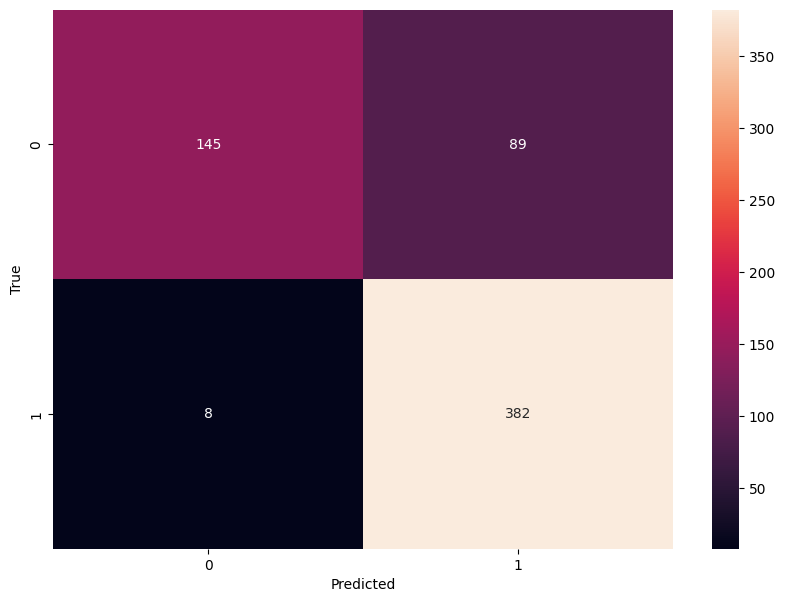

In [25]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
